                                    IMPORTING REQUIRED LIBRARIES AND MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import imblearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from numpy import where
from time import time
%matplotlib inline

In [2]:
#!python3 -m pip install seaborn

Creating Instances

In [3]:
label_encoder=LabelEncoder()
scaler_min=MinMaxScaler()
scaler_std=StandardScaler()

                                    
                                READING DATASETS INTO DATAFRAME

In [4]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [5]:
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [6]:
df_train = pd.read_csv(train_url,header=None, names = columns)

df_test = pd.read_csv(test_url, header=None, names = columns)

In [7]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


                                        Extrapolatry Data Analysis(EDA)

In [9]:
print("Number of instances in train dataset:", df_train.shape[0])
print("Number of instances in test dataset:", df_test.shape[0])

Number of instances in train dataset: 125973
Number of instances in test dataset: 22544


In [10]:
#df_train.describe().transpose()


In [11]:
#df_test.describe().transpose()

In [12]:
#df_test.info()
# NO NULL ENTRIES ARE AVAILABLE

No Null Values Confirmed with below two cells and heatmap shown below

Exploring unique values in each attribute

In [13]:
#df_train.nunique()

In [14]:
#df_test.nunique()

# remove useless feature

In [15]:
# this is deleted because it had only zero value filled in the whole dataset
df_train.drop(columns="num_outbound_cmds", inplace=True)
df_test.drop(columns="num_outbound_cmds", inplace=True)

Checking Datatype of each attribute

Analysis based on Correlation 

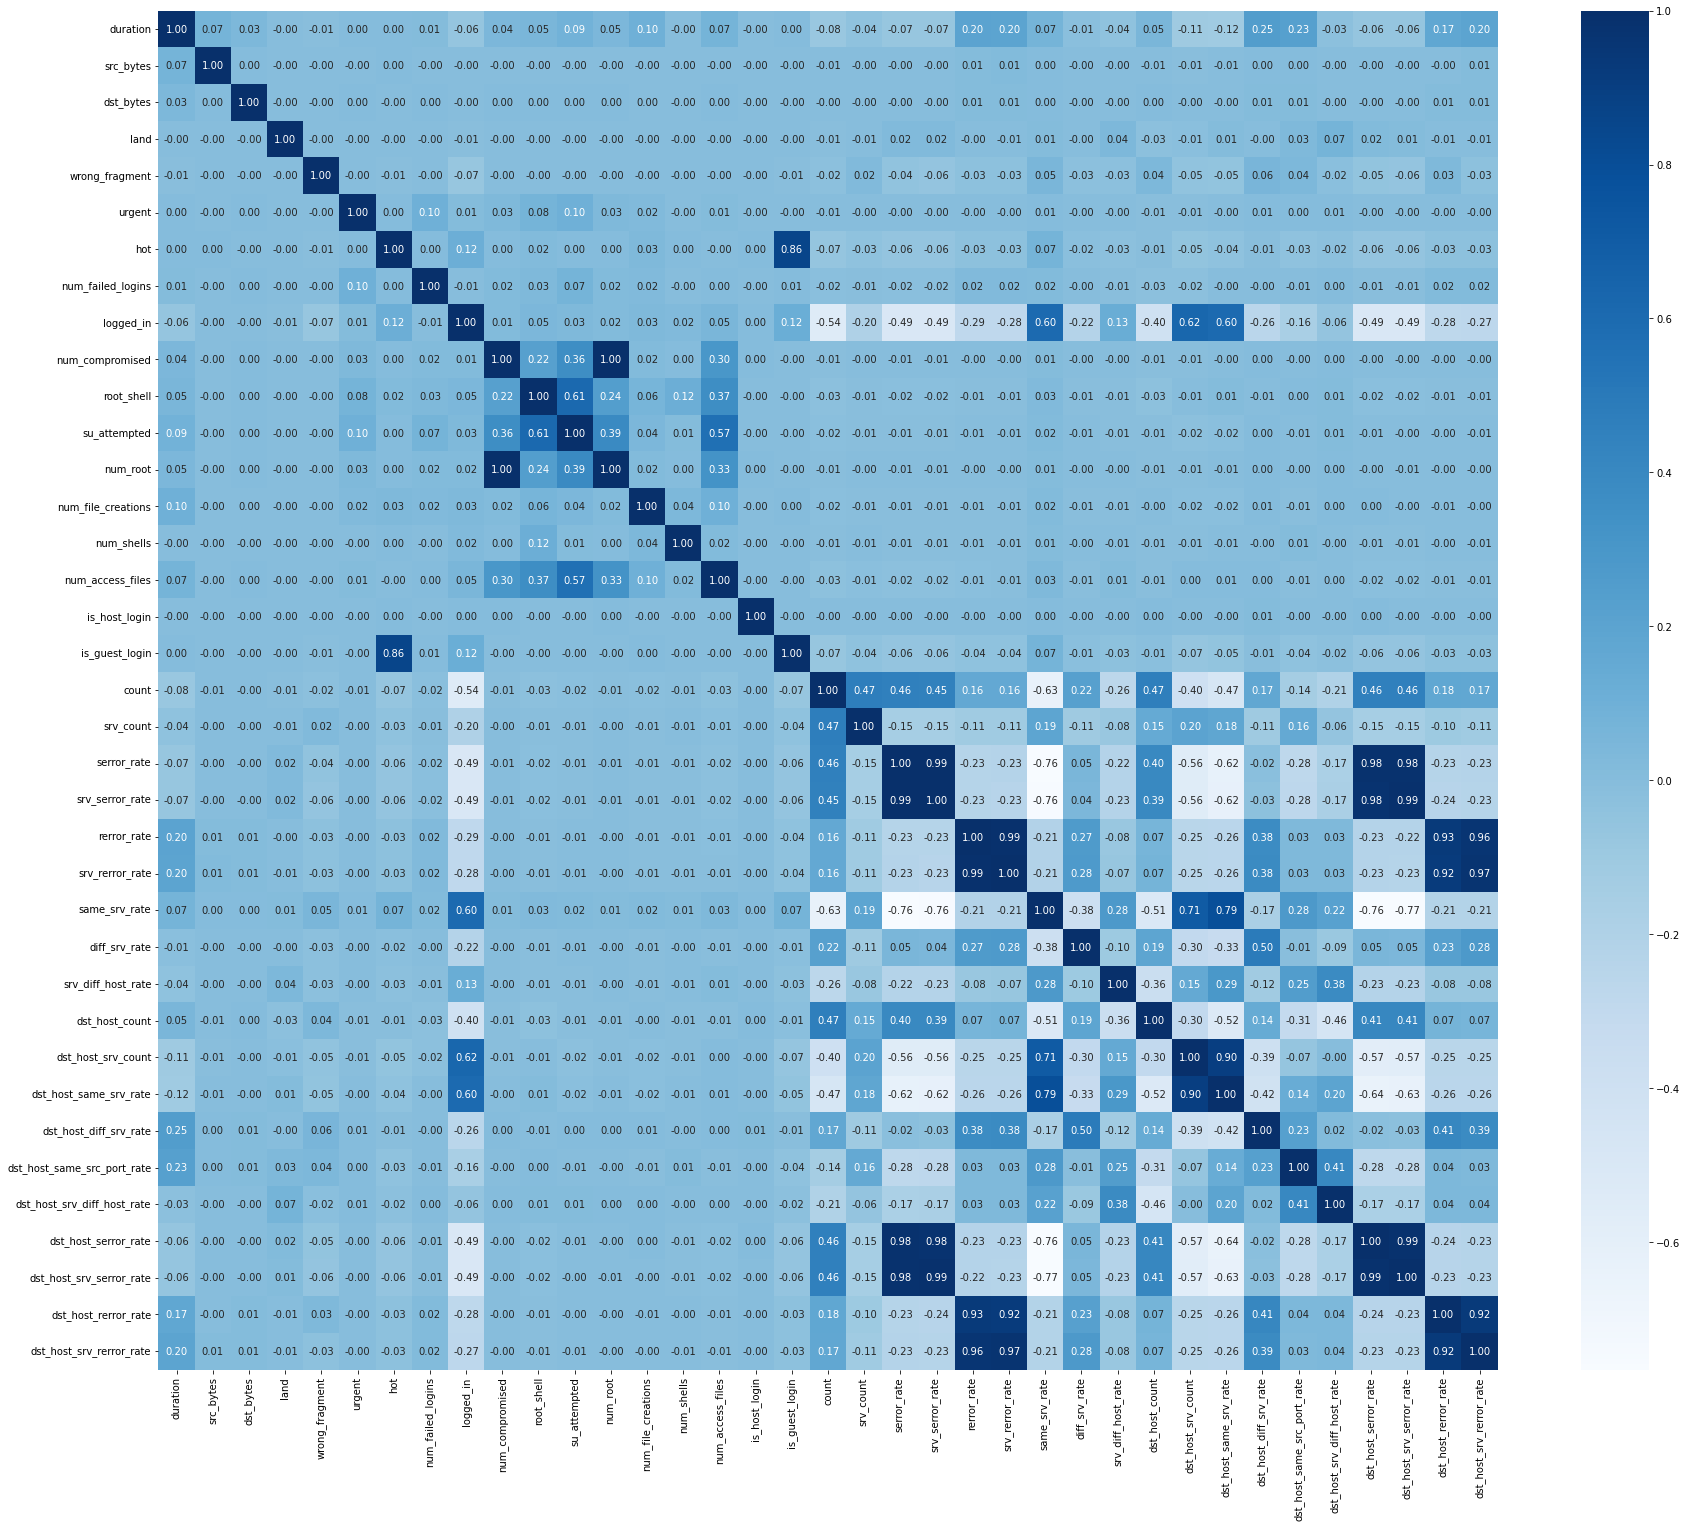

In [16]:
plt.subplots(figsize=(30, 25))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, fmt='0.2f')
plt.savefig("Correlation heatmap",dpi=500)

Attacks Analysis

In [17]:
# Number of attacks in the Dataset
df_train[df_train["label"] != 'normal']['label'].nunique()

22

In [18]:
df_train[df_train["label"] != 'normal']['label'].value_counts()
# from it is clear that neptune attack is most common and spy attack is the least attackers prefer

neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

# Remove data with too less data

Attacks like spy,perl,phf,mutlihop,ftp_write,loadmodule, have instances less than 10 so we will drop these since there will not be sufficient training data.
We can also take this threshold till 20 but here till 10 it considered only.

In [19]:
df_train['label'] = df_train['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_train = df_train.dropna()

In [20]:
df_test['label'] = df_test['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_test = df_test.dropna()

Object datatype

In [21]:
df_train['service']= label_encoder.fit_transform(df_train['service'])
df_test['service']=label_encoder.fit_transform(df_test['service'])
df_train['service'].value_counts()

24    40334
49    21853
12     9043
54     7313
20     6850
      ...  
61        3
27        2
3         2
22        2
25        1
Name: service, Length: 70, dtype: int64

In [22]:
df_train['protocol_type'].replace({'tcp':1,'udp':2,'icmp':3},inplace=True)
df_test['protocol_type'].replace({ 'tcp':1,'udp':2,'icmp':3},inplace=True)
df_train['protocol_type'].value_counts()


1    102656
2     14993
3      8291
Name: protocol_type, dtype: int64

In [23]:
df_train['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_test['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_train['flag'].value_counts()


11    74912
10    34851
9     11233
8      2421
7      1562
6       365
5       271
4       127
3       103
2        49
1        46
Name: flag, dtype: int64

In [24]:
test_attack=df_test['label'].unique().tolist()
train_attack=df_train['label'].unique().tolist()
print(len(test_attack))
print(len(train_attack))
l1=list(set(test_attack)-set(train_attack))
print(l1)
# df_test['label'] = df_test['label'].replace(
#     l1, np.nan)
# df_test = df_test.dropna()
# df_test['label'].nunique()


33
17
['httptunnel', 'apache2', 'named', 'mscan', 'xterm', 'udpstorm', 'xlock', 'worm', 'saint', 'ps', 'sqlattack', 'sendmail', 'snmpguess', 'snmpgetattack', 'processtable', 'mailbomb', 'xsnoop']


In [25]:
df_required=df_test[(df_test['label']=='sendmail') | (df_test['label']=='mailbomb') | (df_test['label']=='worm') | (df_test['label']=='xsnoop') | (df_test['label']=='processtable') |
(df_test['label']=='httptunnel') | (df_test['label']=='sqlattack') | (df_test['label']=='mscan') | (df_test['label']=='udpstorm') | (df_test['label']=='xlock') |
(df_test['label']=='apache2') | (df_test['label']=='saint') | (df_test['label']=='snmpgetattack') | (df_test['label']=='xterm') |(df_test['label']=='named') | (df_test['label']=='ps') | (df_test['label']=='snmpguess')]

In [26]:
df_train=pd.concat([df_train,df_required],axis=0)


In [27]:
df_train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)
df_test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)



In [28]:
df_train['label'].value_counts()

0    67343
1    47646
2    12971
3     1660
4       70
Name: label, dtype: int64

In [29]:
map_to_class={0:'normal',1:'DoS',2:"Probe",3:'R2L',4:"U2R"}

FROM BELOW GRAPH IT IS CLEAR THAT ATTACKS BELONGING TO R2L AND U2R HAVE VERY LOW NUMBER OF INSTANCES<br> WHICH NEEDS TO BE HANDLED TO MAKE A  GOOD MODEL

<AxesSubplot:xlabel='label', ylabel='count'>

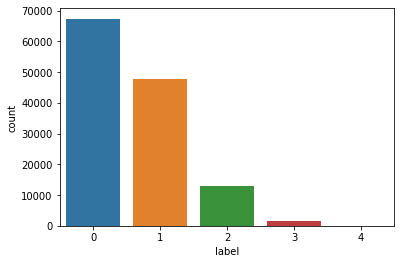

In [30]:
sns.countplot(df_train['label'])

In [31]:
df_test['label'].value_counts()

0    9711
1    7460
3    2862
2    2421
4      63
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

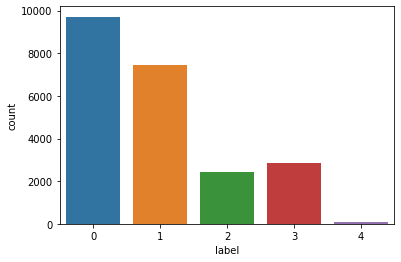

In [32]:
sns.countplot(df_test['label'])

In [33]:
df_train_label=df_train['label']
df_test_label=df_test['label']

STANDARDIZING DATASET BEFORE FEATURE SELECTION

In [34]:
columns_before_normal = ["duration", 'service',"protocol_type", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]

In [35]:
df_train_int=df_train[columns_before_normal]

In [36]:
df_test_int=df_test[columns_before_normal]

USING MINMAX SCALER FOR STANDARDIZING

In [37]:
scaler_min.fit(df_train_int)
x_train = scaler_min.transform(df_train_int)
scaler_min.fit(df_test_int)
x_test = scaler_min.transform(df_test_int)

In [38]:
df_train_minmax_without_label=pd.DataFrame(x_train,columns=columns_before_normal)

In [39]:
df_test_minmax_without_label=pd.DataFrame(x_test,columns=columns_before_normal)

In [40]:
df_train_minmax_without_label.shape

(129690, 40)

In [41]:
df_train_label.shape

(129690,)

In [42]:
cols=df_train_minmax_without_label.columns.tolist()

In [43]:
print(len(cols))

40


In [44]:
train_x=df_train_minmax_without_label[cols]
train_y=df_train_label

HANDLING LABEL CLASS WHICH WERE LOW IN NUMBER BY USING "SMOTE" TECHNIQUE

CONVERTING THE DATA BACK INTO DATAFRAME FORM

Class=0, n=67343 (51.926%)
Class=1, n=47646 (36.738%)
Class=3, n=1660 (1.280%)
Class=2, n=12971 (10.002%)
Class=4, n=70 (0.054%)


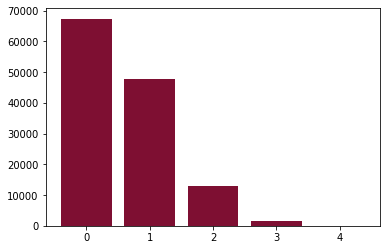

<Figure size 432x288 with 0 Axes>

In [45]:
df_train_data=df_train.values
X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]
counter = Counter(y_before)
for k,v in counter.items():
	per = v / len(y_before) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(),color="#7E0F32")

plt.show()
plt.savefig("Labels before SMOTE in bar chart",dpi=500)

label_list=train_y.tolist()
train_x['label']=label_list

#this  usually takes 3-4 minutes
data = train_x.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [46]:
df_train_X=pd.DataFrame(X,columns=cols)
df_train_X

,duration,service,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.289855,0.000000,1.0,3.558064e-07,0.000000e+00,0.0,0.0,0.000000,0.000000,...,0.588235,0.098039,0.170000,0.030000,0.170000,0.00,0.000000,0.000000,0.050000,0.000000
1,0.000000,0.637681,0.500000,1.0,1.057999e-07,0.000000e+00,0.0,0.0,0.000000,0.000000,...,1.000000,0.003922,0.000000,0.600000,0.880000,0.00,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.710145,0.000000,0.9,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,...,1.000000,0.101961,0.100000,0.050000,0.000000,0.00,1.000000,1.000000,0.000000,0.000000
3,0.000000,0.347826,0.000000,1.0,1.681203e-07,6.223962e-06,0.0,0.0,0.000000,0.000000,...,0.117647,1.000000,1.000000,0.000000,0.030000,0.04,0.030000,0.010000,0.000000,0.010000
4,0.000000,0.347826,0.000000,1.0,1.442067e-07,3.206260e-07,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,0.009337,0.814180,0.119425,1.0,9.581042e-07,1.399188e-05,0.0,0.0,0.000000,0.000000,...,1.000000,0.009891,0.007611,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
336711,0.000000,0.282456,0.000000,1.0,0.000000e+00,3.392424e-06,0.0,0.0,0.000000,0.000000,...,0.003922,0.003922,1.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000
336712,0.001142,0.845365,0.000000,1.0,3.960435e-07,5.238041e-06,0.0,0.0,0.333333,0.012987,...,1.000000,0.039260,0.043378,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
336713,0.004622,0.813363,0.000000,1.0,1.812052e-06,2.530883e-05,0.0,0.0,0.000000,0.018816,...,0.022248,0.016165,0.689764,0.310236,0.182047,0.00,0.000000,0.000000,0.026929,0.026929


In [47]:
label="label"
df_train_Y=pd.DataFrame(y)

In [48]:
df_train_Y.rename(columns={0:"label"},inplace=True)

In [49]:
train_x=df_train_X
train_y=df_train_Y

                                     Feature Selection

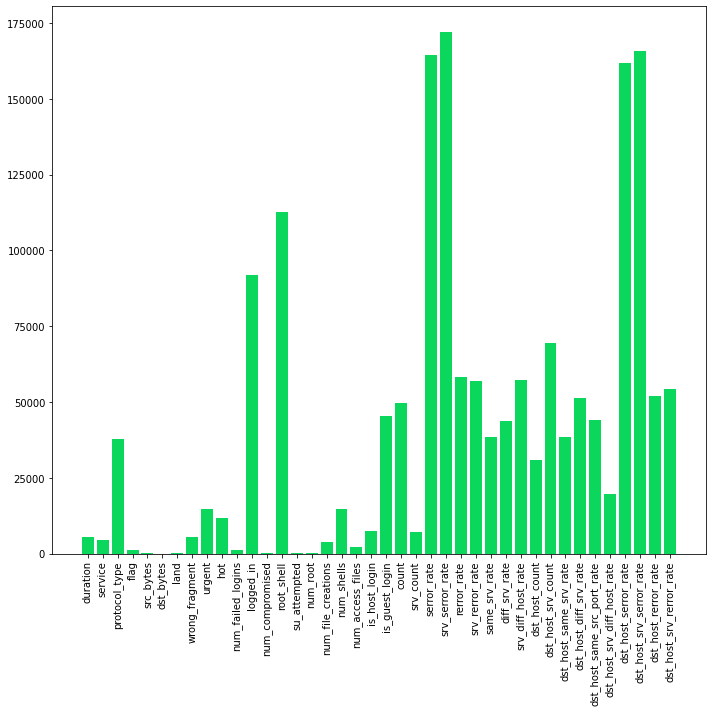

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(train_x, train_y)
# plot the score associated with each feature
plt.figure(figsize=(10,10))
plt.bar([i for i in range(len(features.scores_))], features.scores_,color='#0BD75C')
plt.xticks([i for i in range(len(features.scores_))], df_train_X.columns)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('features', dpi=500)

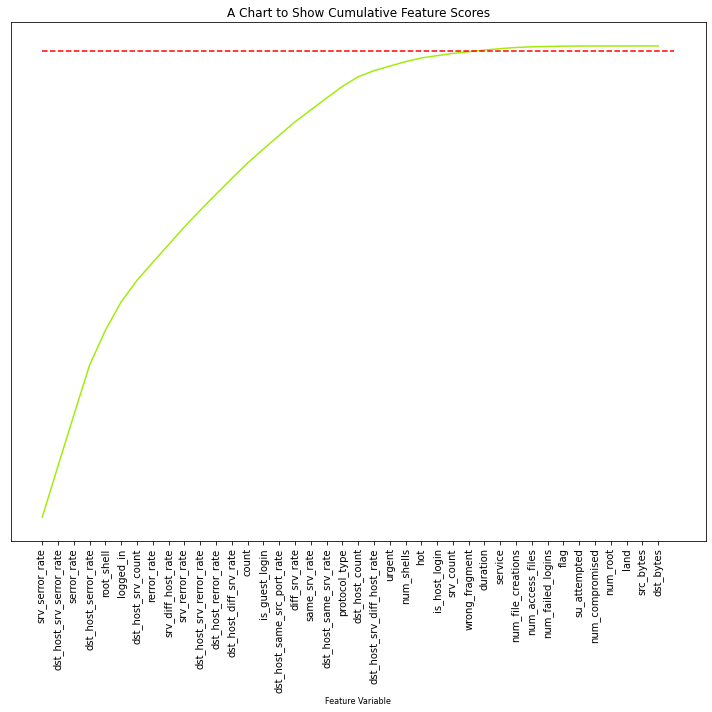

In [51]:
# sort the features by importance score
plt.figure(figsize=(10,10))
feature_importances = zip(df_train_X.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances,color='#A2EC0D')

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical',)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores')
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features', dpi=500)

# Above Chart Shows that 99% of the feature score is from first 25 columns and rest of the columns doesn't contribute much so taking only those 25 features for further modelling

In [52]:
# perform selectkbest with k=40
features = SelectKBest(score_func=chi2, k=25)
fit = features.fit(train_x,train_y)
train_x = fit.transform(train_x)


In [53]:
new_features = df_train_X.columns[features.get_support(indices=True)]

In [54]:
new_features

Index(['protocol_type', 'urgent', 'hot', 'logged_in', 'root_shell',
       'num_shells', 'is_guest_login', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

to_check have rest 15 attributes which should not be part of the resulting dataframe

In [55]:
df_train_model=df_train_X[new_features]
df_test_model=df_test_minmax_without_label[new_features]

MAKING DATASETS READY FOR MODELLING

In [56]:
X_train=df_train_model
Y_train=df_train_Y['label']
X_test=df_test_model
Y_test=df_test_label

CHECKING IF THE FINAL DATASET HAVE ANY NULL VALUES OR NOT

CHECKING SHAPE OF THE FINAL DATASETS

In [57]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(336715, 25) (22517, 25) (336715,) (22517,)


                                     TRAINING AND TESTING OF MACHINE LEARNING ALGORITHMS 

# DECISION TREE

In [58]:
clf1 = DecisionTreeClassifier(random_state=0)
t0 = time()
clf1.fit(X_train, Y_train)
tt1 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt1, 3)))

Classifier trained in 2.167 seconds.


In [59]:

t0 = time()
predDT = clf1.predict(X_test)
tt12 = time() - t0
print("Predicted in {} seconds".format(round(tt12, 3)))

Predicted in 0.005 seconds


In [60]:
accDT = accuracy_score(Y_test, predDT)
print("Accuracy is {}.".format(round(accDT, 4)))



Accuracy is 0.8747.


# RANDOM FOREST

In [61]:
# this usually takes 1-2 minutes
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
t0 = time()
clf2.fit(X_train, Y_train)
tt2 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt2, 3)))

Classifier trained in 24.512 seconds.


In [62]:
t0 = time()
predRF = clf2.predict(X_test)
tt22 = time() - t0
print("Predicted in {} seconds".format(round(tt22, 3)))
print(predRF)

Predicted in 0.133 seconds
[1. 1. 0. ... 1. 0. 2.]


In [63]:
accRF = accuracy_score(Y_test, predRF)
print("Accuracy is {}.".format(round(accRF, 4)))




Accuracy is 0.8817.


# NAIVE-BAYES

In [64]:
from sklearn.naive_bayes import BernoulliNB
clf3 = BernoulliNB()
t0 = time()
clf3.fit(X_train, Y_train)
tt3 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt3, 3)))

Classifier trained in 0.177 seconds.


In [65]:
t0 = time()
predNB = clf3.predict(X_test)
tt32 = time() - t0
print("Predicted in {} seconds".format(round(tt32, 3)))
print(predNB)

Predicted in 0.01 seconds
[2. 2. 0. ... 4. 0. 2.]


In [66]:
accNB = accuracy_score(Y_test, predNB)
print("Accuracy is {}.".format(round(accNB, 4)))



Accuracy is 0.6242.


In [67]:
#this usually takes around 30 seconds
clf4 = LogisticRegression()
t0 = time()
clf4.fit(X_train, Y_train)
tt4 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt4, 3)))

Classifier trained in 5.801 seconds.


In [68]:
t0 = time()
predLR = clf4.predict(X_test)
tt42 = time() - t0
print("Predicted in {} seconds".format(round(tt42, 3)))

Predicted in 0.003 seconds


In [69]:
accLR = accuracy_score(Y_test, predLR)
print("Accuracy is {}.".format(round(accLR, 4)))



Accuracy is 0.8084.


# SUPPORT VECTOR MACHINE

In [70]:
#this usually takes 75 seconds
from sklearn.svm import LinearSVC
clf5= LinearSVC(random_state=0)
t0 = time()
clf5.fit(X_train, Y_train)
tt5 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt5, 3)))

Classifier trained in 37.636 seconds.


In [71]:
t0 = time()
predSVM = clf5.predict(X_test)
tt52 = time() - t0
print("Predicted in {} seconds".format(round(tt52, 3)))


Predicted in 0.004 seconds


In [72]:
accSVM = accuracy_score(Y_test, predSVM)
print("Accuracy is {}.".format(round(accSVM, 4)))

Accuracy is 0.8201.


                                             EVALUATION AND ANALYSIS

COMPARING ON THE BASIS OF ACCURACY SCORE

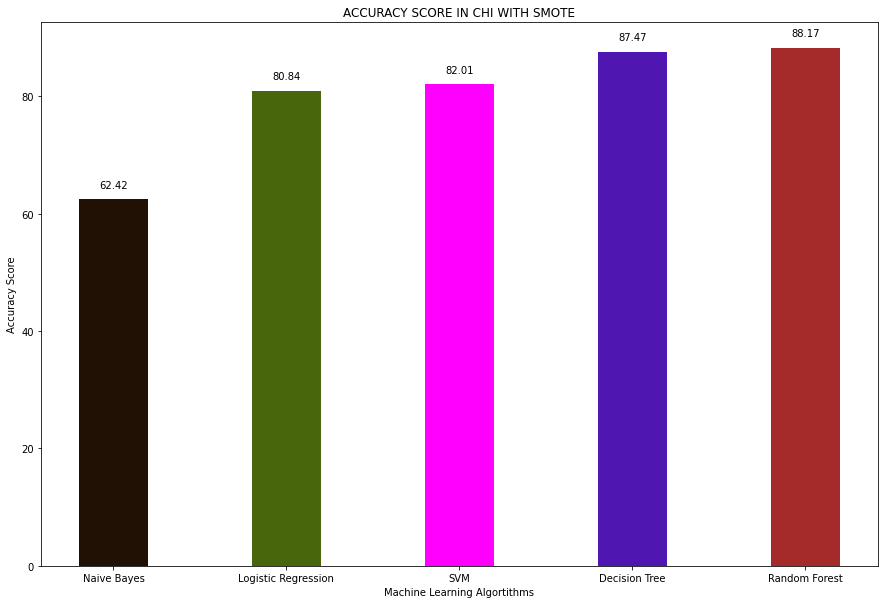

In [73]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
names=['Naive Bayes','Logistic Regression','SVM','Decision Tree','Random Forest']
AccuracyScore=[accNB*100,accLR*100,accSVM*100,accDT*100,accRF*100]
plt.figure(figsize=(15,10))
plt.bar(names,AccuracyScore,0.4,color=['#211105','#48660C','magenta','#5016B1','brown'])
addlabels(names, AccuracyScore)
plt.title("ACCURACY SCORE IN CHI WITH SMOTE")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
# plt.legend(names)
plt.savefig("Accuracy in CHI with SMOTE",dpi=500)

In [74]:
plt.figure(figsize=(10,10))
plt.plot(names,training_times,marker='o',color="#9467bd")
plt.plot(names,pred_time,marker='x',color="#e377c2")
plt.xticks(rotation=90)
plt.legend(['Training Time','Prediction Time'])
plt.savefig("Training Time And Prediction Time.png",dpi=500)
plt.show()

NameError: name 'training_times' is not defined

<Figure size 720x720 with 0 Axes>